## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [7]:
import pandas as pd
!pip install pandas_datareader
import pandas_datareader as pdr
from pandas_datareader import data,wb
from datetime import date

startdate = pd.to_datetime('2017-01-01')
enddate = pd.to_datetime('2018-12-31')
data.DataReader("AAPL", 'stooq', startdate, enddate)

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,38.2484,38.4537,37.7529,38.0629,1.450657e+08
2018-12-28,38.0031,38.2454,37.2922,37.6961,1.752693e+08
2018-12-27,37.6033,37.8247,36.2145,37.6761,2.201343e+08
2018-12-26,35.7828,37.9363,35.4040,37.9233,2.427850e+08
2018-12-24,35.7470,36.5664,35.3721,35.4309,1.540413e+08
...,...,...,...,...,...
2017-01-09,27.5948,27.9457,27.5918,27.8381,1.352219e+08
2017-01-06,27.3247,27.6476,27.2529,27.5858,1.321675e+08
2017-01-05,27.1223,27.3426,27.0954,27.2867,9.273204e+07


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

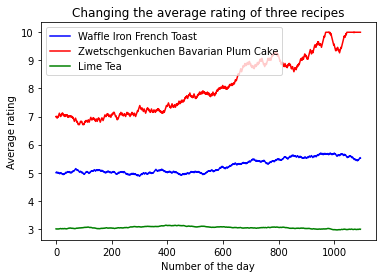

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
avg_ratings = np.load('average_ratings.npy')

# Create a time range from 0 to the number of days in the dataset
time_range = range(len(avg_ratings[0]))

# Plot each time series with a unique color
plt.plot(time_range, avg_ratings[0], color='blue', label='Waffle Iron French Toast')
plt.plot(time_range, avg_ratings[1], color='red', label='Zwetschgenkuchen Bavarian Plum Cake')
plt.plot(time_range, avg_ratings[2], color='green', label='Lime Tea')

# Add axis labels and a figure caption
plt.xlabel('Number of the day')
plt.ylabel('Average rating')
plt.title('Changing the average rating of three recipes')

# Add a legend to display the name of each recipe
plt.legend()

# Display the plot
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".

<ipython-input-1-c000e05a7e1a>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels)


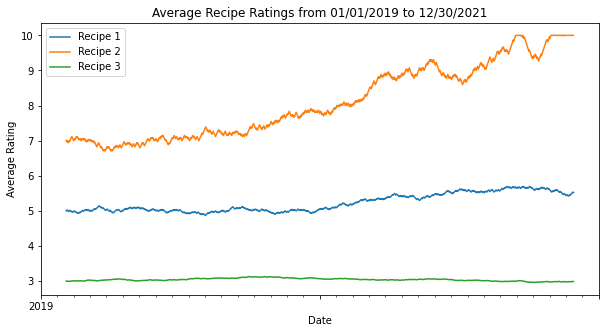

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


avg_ratings = np.load('average_ratings.npy')

start_date = datetime.strptime('01/01/2019', '%m/%d/%Y')
end_date = datetime.strptime('12/30/2021', '%m/%d/%Y')
dates = []
while start_date <= end_date:
    dates.append(start_date)
    start_date += timedelta(days=1)


fig, ax = plt.subplots(figsize=(10, 5))


for i in range(len(avg_ratings)):
    ax.plot(dates, avg_ratings[i], label='Recipe {}'.format(i+1), color=['tab:blue', 'tab:orange', 'tab:green'][i])


major_locator = plt.LinearLocator(numticks=3)
minor_locator = plt.LinearLocator(numticks=35)
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)


years = sorted(list(set([date.year for date in dates])))
tick_labels = []
for year in years:
    tick_labels.append(str(year))
    for month in range(1, 13):
        tick_labels.append('')
        ax.set_xticklabels(tick_labels)


ax.set_xlabel('Date')
ax.set_ylabel('Average Rating')
ax.set_title('Average Recipe Ratings from 01/01/2019 to 12/30/2021')


ax.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

ValueError: ValueError: x and y must have same first dimension, but have shapes (1095,) and (3,)

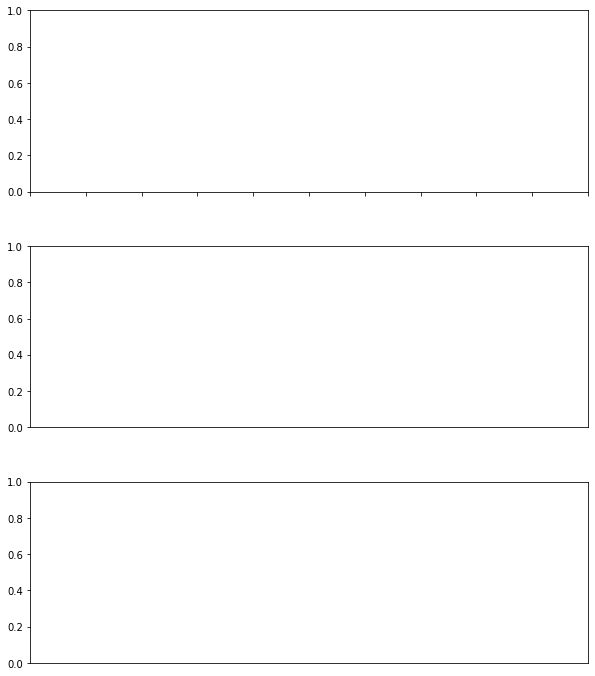

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load the data
avg_ratings = np.load("average_ratings.npy")

# Create a date range
start_date = datetime.date(2019, 1, 1)
end_date = datetime.date(2021, 12, 30)
date_range = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Plot the data
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
plt.subplots_adjust(hspace=0.3)
axs[0].plot(date_range, avg_ratings[:,0], color="#1f77b4", label="Recipe 1")
axs[1].plot(date_range, avg_ratings[:,1], color="#ff7f0e", label="Recipe 2")
axs[2].plot(date_range, avg_ratings[:,2], color="#2ca02c", label="Recipe 3")

# Set up the axis locators
maj_loc = plt.matplotlib.dates.YearLocator()
min_loc = plt.matplotlib.dates.MonthLocator()
axs[2].xaxis.set_major_locator(maj_loc)
axs[2].xaxis.set_minor_locator(min_loc)
axs[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
axs[1].xaxis.set_minor_locator(min_loc)
axs[0].xaxis.set_minor_locator(min_loc)
axs[0].tick_params(axis='both', which='both', length=0)

# Set up the axis labels and title
fig.suptitle("Average Recipe Ratings from 2019 to 2021", fontsize=16)
axs[2].set_xlabel("Date", fontsize=12)
axs[1].set_ylabel("Average Rating", fontsize=12)
axs[0].set_title("Recipe 1", fontsize=14)
axs[1].set_title("Recipe 2", fontsize=14)
axs[2].set_title("Recipe 3", fontsize=14)

# Add legends to each subplot
for ax in axs:
    ax.legend()

# Display the plot
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".

Text(0.5, 1.0, 'Change in the number of users on a linear and logarithmic scale')

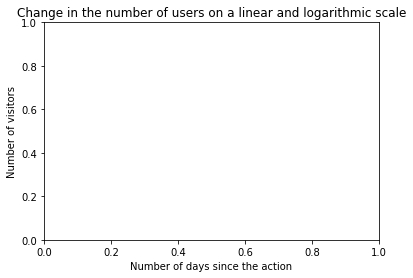

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd

file1_ = 'visitors.npy'
rdr1 = np.load(file1_)
rdr1
plt.xlabel('Number of days since the action')
plt.ylabel('Number of visitors')
plt.title('Change in the number of users on a linear and logarithmic scale')

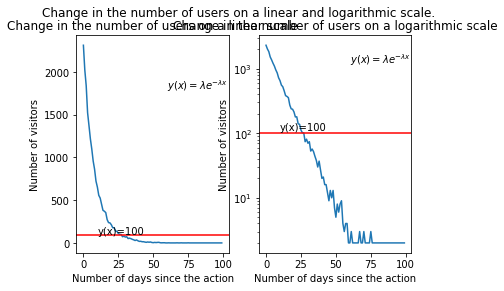

In [1]:
import matplotlib.pyplot as plt
import numpy as np

visitors = np.load('visitors.npy')


plt.subplot(1,2,1)
plt.plot(visitors)
plt.xlabel('Number of days since the action')
plt.ylabel('Number of visitors')
plt.title('Change in the number of users on a linear scale')
plt.text(60, 1800, r"$y(x)=\lambda e^{-\lambda x}$")
plt.axhline(y=100, color='red')
plt.text(10, 105, 'y(x)=100')

plt.subplot(1,2,2)
plt.semilogy(visitors)
plt.xlabel('Number of days since the action')
plt.ylabel('Number of visitors')
plt.title('Change in the number of users on a logarithmic scale')
plt.text(60, 1200, r"$y(x)=\lambda e^{-\lambda x}$")
plt.axhline(y=100, color='red')
plt.text(10, 110, 'y(x)=100')


plt.suptitle('Change in the number of users on a linear and logarithmic scale.')

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [3]:

import pandas as pd

recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")
print('recipes file: ', recipes)
print('reviews file: ', reviews)

recipes file:                                                 name      id  minutes  \
0             george s at the cove  black bean soup   44123       90   
1                healthy for them  yogurt popsicles   67664       10   
2                      i can t believe it s spinach   38798       30   
3                              italian  gut busters   35173       45   
4          love is in the air  beef fondue   sauces   84797       25   
...                                             ...     ...      ...   
29995  zurie s holey rustic olive and cheddar bread  267661       80   
29996          zwetschgenkuchen  bavarian plum cake  386977      240   
29997   zwiebelkuchen   southwest german onion cake  103312       75   
29998                                   zydeco soup  486161       60   
29999        cookies by design   cookies on a stick  298512       29   

       contributor_id   submitted  n_steps  \
0               35193  2002-10-25      NaN   
1               91970  2003-

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

<ipython-input-3-13e8e75530a8>:29: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.pie(sizes, explode=explode, labels=recipe_groups, autopct="%1.1f%%", shadow=True, startangle=90)


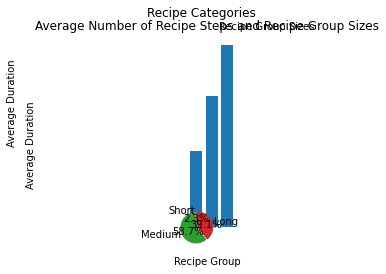

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

recipes = pd.read_csv("recipes_sample.csv")

#categorize recipes based on duration
short = recipes[recipes["minutes"] < 5]
medium = recipes[(recipes["minutes"] >= 5) & (recipes["minutes"] < 50)]
long = recipes[recipes["minutes"] >= 50]

#calculate average number of recipe steps and the size of the group for each category
short_avg_steps = short["n_steps"].mean()
short_size = len(short)
medium_avg_steps = medium["n_steps"].mean()
medium_size = len(medium)
long_avg_steps = long["n_steps"].mean()
long_size = len(long)

#create bar chart
recipe_groups = ["Short", "Medium", "Long"]
avg_steps = [short_avg_steps, medium_avg_steps, long_avg_steps]
plt.bar(recipe_groups, avg_steps)
plt.xlabel("Recipe Group")
plt.ylabel("Average Duration")

#create pie chart
sizes = [short_size, medium_size, long_size]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=recipe_groups, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')


plt.suptitle("Recipe Categories")
plt.title("Average Number of Recipe Steps and Recipe Group Sizes")
plt.figtext(0.05, 0.5, "Average Duration", rotation="vertical")
plt.figtext(0.65, 0.9, "Recipe Group Sizes", ha="center")

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

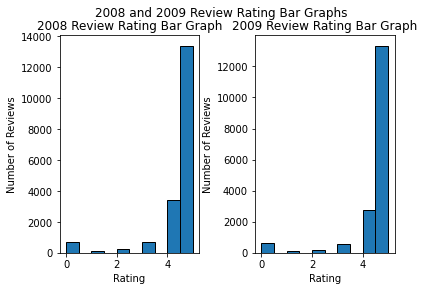

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read data file
df = pd.read_csv('reviews_sample.csv')

# converting date column to datetime type
df['date'] = pd.to_datetime(df['date'])

# filter data for years 2008 and 2009
df_filtered = df[df['date'].dt.year.isin([2008, 2009])]

# creating histogram for 2008 ratings
plt.subplot(1, 2, 1)
plt.hist(df_filtered[df_filtered['date'].dt.year == 2008]['rating'], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('2008 Review Rating Bar Graph')

# creating histogram for 2009 ratings
plt.subplot(1, 2, 2)
plt.hist(df_filtered[df_filtered['date'].dt.year == 2009]['rating'], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('2009 Review Rating Bar Graph')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# add caption
plt.suptitle('2008 and 2009 Review Rating Bar Graphs')

# display plot
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

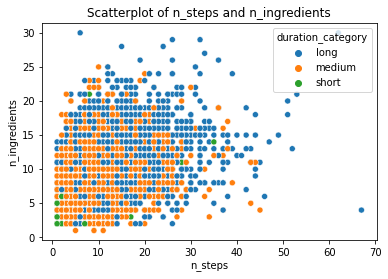

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
recipes = pd.read_csv("recipes_sample.csv")

# Create duration categories
conditions = [
    recipes["minutes"] < 5,
    (recipes["minutes"] >= 5) & (recipes["minutes"] < 50),
    recipes["minutes"] >= 50,
]
values = ["short", "medium", "long"]
recipes["duration_category"] = pd.Series(
    np.select(conditions, values), index=recipes.index
)

# Create scatterplot
sns.scatterplot(x="n_steps", y="n_ingredients", hue="duration_category", data=recipes)
plt.title("Scatterplot of n_steps and n_ingredients")

# Show plot
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

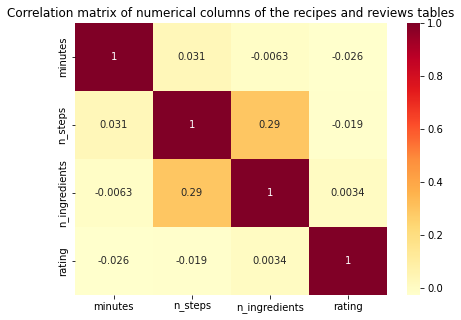

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")

merged = pd.merge(recipes, reviews, on="id")

cols = ["minutes", "n_steps", "n_ingredients", "rating"]
selected = merged[cols]


corr_matrix = selected.corr()


fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd", ax=ax)


ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
ax.set_title("Correlation matrix of numerical columns of the recipes and reviews tables")

plt.show()